# **CSCI4750/5750: ML Practicum: Image classification and clustering**

Author: Jie Hou, Nov 16-18, Fall 2020

**Topics**: Deep learning, K-menas clustering, hierarchical clustering, PCA/TSNE for visualization

*For ML practicum only in the machine learning course (CSCI4750/5750).* 

**We have four objectives in this practicum**: 

1. According to the experiment in paper [ImageNet Classification with Deep Convolutional Neural Networks
](https://papers.nips.cc/paper/2012/file/c399862d3b9d6b76c8436e924a68c45b-Paper.pdf), we can **design a convolutional neural network to classify** an image into a specific class.

2. More importantly, as shown in the following figure from the paper, given any input image, the corresponding **feature vector learned from the last hidden layer of the CNN** can be used to find similar images in the training data set by calculating the Euclidean distance between any two feature vectors. In the last section, we will develop an image searching engine

3. Therefore, the feature vectors derived from the deep learning network can also be used for **image clustering**.

4. We will extend our algorithms to develop an **image search web server**.

<img src="https://cs.slu.edu/~hou/5750/demos/Nov16_fig1.png" width="800" height="250">


<img src="https://cs.slu.edu/~hou/5750/demos/Nov16_fig2.png" width="800" height="450">


<img src="https://cs.slu.edu/~hou/5750/demos/Nov18.png" width="800" height="700">


Useful Reference: 
1. Demo: [Nov13_unsupervised_learning_for_class.ipynb](https://colab.research.google.com/drive/1eAuccyTV9ZkSyMoAtiO2YZK6qVtcmCzE?usp=sharing)

2. Demo: [Tips_in_DeepLearning_Image_Processing.ipynb](https://colab.research.google.com/drive/1H255wxT4plC7Zlx59w0m07heYox7tEIM?usp=sharing)

3. Google resources



Recommended Papers: 

[ImageNet Classification with Deep Convolutional Neural Networks
](https://papers.nips.cc/paper/2012/file/c399862d3b9d6b76c8436e924a68c45b-Paper.pdf)

[A soft clustering technique with layered feature extraction for social image mining](https://link.springer.com/article/10.1007/s11042-018-6881-9)



**In this practicum, we have in total of 12 tasks for everyone to complete. Please try your best to complete them.** 


# **1. Objective 1: design a convolutional neural network for image classification**

**1.1 Load the CIFAR10**

First of all, we can work on the popular dataset called 'CIFAR10', containing 32x32 color images of 10 categories of objects. Below are labels for the objects - airplane, automobile, bird, cat, deer, dog, frog, horse, ship, and truck.

We can directly load the dataset into memory from module 'keras.datasets,' which contains:

**Training Set**: 50000 images, dimension shape: 50000 * 32 * 32 *3

**Test Set**: 10000 images, dimension shape: 10000 * 32 * 32 *3

In [1]:
from keras.datasets import cifar10
import matplotlib.pyplot as plt
import numpy as np
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

y_train, y_test = y_train.reshape(-1, 1), y_test.reshape(-1, 1)

labels_map = ['airplane', 'automobile', 'bird', 'cat', 'deer', 
              'dog', 'frog', 'horse', 'ship', 'truck']


170500096/170498071 [==============================] - 2s 0us/step


In [2]:
print("X_train.shape: ",X_train.shape)
print("X_test.shape: ",X_test.shape)
print("y_train.shape: ",y_train.shape)
print("y_test.shape: ",y_test.shape)

X_train.shape:  (50000, 32, 32, 3)
X_test.shape:  (10000, 32, 32, 3)
y_train.shape:  (50000, 1)
y_test.shape:  (10000, 1)


**1.2 Using matplotlib, you can visualize the numpy data as image as follows:**

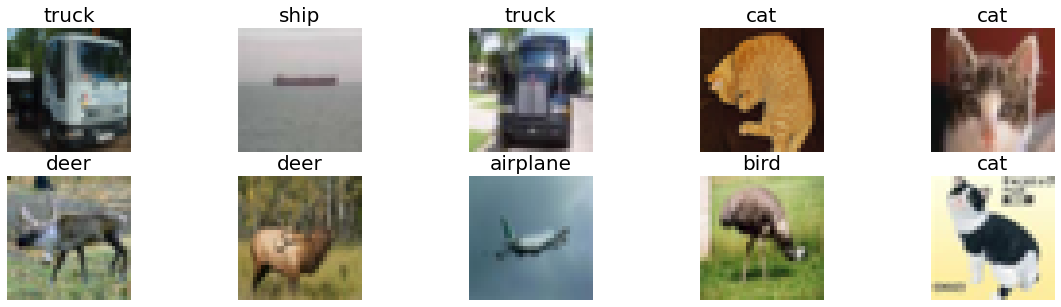

In [3]:
fig = plt.figure(figsize=(20, 5))

for ii in range(10):
    jj = np.random.choice(range(len(X_train)))
    label = [labels_map[j] for j in y_train[jj]][-1]
    imgplot = fig.add_subplot(2,5,ii+1) 
    imgplot.imshow(X_train[jj])
    imgplot.set_title(label, fontsize=20)
    imgplot.axis('off')

**1.3 Train the CNN network (use GPU on Google Colab)**


Let's first review our previous demo to train a deep learning network

Demo: [Tips_in_DeepLearning_Image_Processing.ipynb](https://colab.research.google.com/drive/1H255wxT4plC7Zlx59w0m07heYox7tEIM?usp=sharing)


**Introduction to Convolutional Neural Network**


<img src="https://miro.medium.com/max/700/1*qsbsCVyu376kqdnNcdxmmw.png" width="800" height="200" />


<img src="https://www.researchgate.net/profile/Baptiste_Wicht/publication/322505397/figure/fig5/AS:583063998308353@1516024698839/A-valid-convolution-of-a-5x5-image-with-a-3x3-kernel-The-kernel-will-be-applied-to.png" width="400" height="200" />

CNN will use a small-size matrix called 'kernel' (i.e., 3x3) to slide over all the image locations by following the directions of left to right and up to down. The kernel matrix will multiply the window within the input feature matrix in each location and then sum up values. The sum value will be treated as the convolution results and saved in the corresponding location in the new feature map'. 



**1.3.1 Feature scaling before feeding into the CNN and clustering**

In [4]:
num_classes = len(labels_map)
from keras.utils.np_utils import to_categorical
## convert to one-hot encoding for classification
y_train_categorical = to_categorical(y_train, num_classes)
y_test_categorical = to_categorical(y_test, num_classes) 

## Feature Min-Max normalization
X_train_s = X_train.astype('float32')/255
X_test_s = X_test.astype('float32')/255

**Your Task 1: write codes to check the dimension of the following variables:**

1. X_train
2. X_test
3. X_train_s
4. X_test_s
5. y_train
6. y_test
7. y_train_categorical
8. y_test_categorical

In [5]:
# Dimension of the variables
print(X_train.shape)
print(X_test.shape)
print(X_train_s.shape)
print(X_test_s.shape)
print(y_train.shape)
print(y_test.shape)
print(y_train_categorical.shape)
print(y_test_categorical.shape)

(50000, 32, 32, 3)
(10000, 32, 32, 3)
(50000, 32, 32, 3)
(10000, 32, 32, 3)
(50000, 1)
(10000, 1)
(50000, 10)
(10000, 10)



**Your task 2: assign appropriate number of hiddhen neurons in the last hidden layer. The number may affect your dimension of feature vectors for clustering**

In [11]:
from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import train_test_split
from keras.layers import Conv2D,MaxPooling2D
from keras import regularizers
from keras.layers import Flatten,BatchNormalization,Dropout,Activation

from keras.callbacks import EarlyStopping, ModelCheckpoint
keras_callbacks   = [
      EarlyStopping(monitor='val_loss', patience=5, mode='min', min_delta=0.0001),
      ModelCheckpoint('./checkmodel.h5', monitor='val_loss', save_best_only=True, mode='min')
]

# Define the model
model = Sequential()
model.add(Conv2D(48, (3, 3), padding='same', input_shape=(32,32,3)))
model.add(Activation('relu'))
model.add(Conv2D(48, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(96, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(96, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(192, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(192, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))

## Your task, set appropriate number of hiddhen neurons. This may affect your dimension of feature vectors for clustering
model.add(Dense(50))



model.add(Activation('relu'))
model.add(Dense(num_classes, activation='softmax'))
model.compile(loss = "categorical_crossentropy", optimizer = "adam", metrics = ['accuracy'])


In [12]:
history = model.fit(X_train_s,y_train_categorical, validation_split=0.1, batch_size=64, epochs = 10, callbacks=keras_callbacks)

Epoch 1/10
704/704 [==============================] - 8s 11ms/step - loss: 1.8162 - accuracy: 0.3071 - val_loss: 1.4485 - val_accuracy: 0.4660
Epoch 2/10
704/704 [==============================] - 8s 11ms/step - loss: 1.3110 - accuracy: 0.5263 - val_loss: 1.1053 - val_accuracy: 0.6058
Epoch 3/10
704/704 [==============================] - 8s 11ms/step - loss: 1.0762 - accuracy: 0.6187 - val_loss: 0.9092 - val_accuracy: 0.6788
Epoch 4/10
704/704 [==============================] - 8s 11ms/step - loss: 0.9405 - accuracy: 0.6720 - val_loss: 0.7874 - val_accuracy: 0.7208
Epoch 5/10
704/704 [==============================] - 8s 11ms/step - loss: 0.8471 - accuracy: 0.7044 - val_loss: 0.7239 - val_accuracy: 0.7478
Epoch 6/10
704/704 [==============================] - 8s 11ms/step - loss: 0.7696 - accuracy: 0.7308 - val_loss: 0.6894 - val_accuracy: 0.7662
Epoch 7/10
704/704 [==============================] - 8s 11ms/step - loss: 0.7284 - accuracy: 0.7481 - val_loss: 0.6600 - val_accuracy: 0.7742

**Your Task 3: write codes to evaluate the classification accuracy in training set and testing set**

In [16]:
model.evaluate(X_train_s,y_train_categorical)

1563/1563 [==============================] - 6s 4ms/step - loss: 0.4595 - accuracy: 0.8399


[0.45952796936035156, 0.8398799896240234]

In [17]:
model.evaluate(X_test_s,y_test_categorical)

313/313 [==============================] - 1s 4ms/step - loss: 0.6529 - accuracy: 0.7821


[0.6528767943382263, 0.7821000218391418]

# **2. Objective 2:**:Given any input image, use the corresponding **feature vector learned from the last hidden layer of the CNN** to find similar images in the training data set by calculating the Euclidean distance between any two feature vectors.




**Your Task 4: print out the model architecture, and describe which layer will be used for feature extraction**

In [18]:
## write your solution here to print out the model summary

model.summary()


Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 32, 32, 48)        1344      
_________________________________________________________________
activation_16 (Activation)   (None, 32, 32, 48)        0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 30, 30, 48)        20784     
_________________________________________________________________
activation_17 (Activation)   (None, 30, 30, 48)        0         
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 15, 15, 48)        0         
_________________________________________________________________
dropout_8 (Dropout)          (None, 15, 15, 48)        0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 15, 15, 96)       

In [ ]:
## write your solution here to describe which layer will be used for feature extraction

**2.1 Let's create a function to get the last hidden layers from the model for feature extraction**


In [19]:

from keras import backend as K
Get_Hidden_Layered_Output = K.function([model.layers[0].input],
                                      [model.layers[-2].output])
                                      


**2.2 Generate feature vectors for training images**

In order to avoid out of memory, I set the batch size to derive the feature vectors

In [20]:
X_train_featureVector = []

batch_size = 500

for i in range(int(X_train_s.shape[0]/batch_size)):
  X_train_featureVector.append(Get_Hidden_Layered_Output([X_train_s[i*batch_size:(i+1)*batch_size,:,:,:]])[0])

  
X_train_featureVector = np.concatenate(X_train_featureVector,axis=0)

**2.3 Generate feature vectors for testing images**

In order to avoid out of memory, I set the batch size to derive the feature vectors

In [21]:

X_test_featureVector = []

batch_size = 500

for i in range(int(X_test_s.shape[0]/batch_size)):
  X_test_featureVector.append(Get_Hidden_Layered_Output([X_test_s[i*batch_size:(i+1)*batch_size,:,:,:]])[0])

 
X_test_featureVector = np.concatenate(X_test_featureVector,axis=0)

**Your Task 5: check the dimension of the following variables to see if the dimension matches the number of hidden neurons you set**

1. X_train_featureVector
2. X_test_featureVector


In [ ]:
## write your codes here to check the dimension

In [22]:
print("X_train_featureVector.shape: ",X_train_featureVector.shape)
print("X_test_featureVector.shape: ",X_test_featureVector.shape)

X_train_featureVector.shape:  (50000, 50)
X_test_featureVector.shape:  (10000, 50)


**Your Task 6(Most challenging one in this Practicum, can skip in class, and continue to work on after the class): Find the similar images using euclidean distance**. You can follow the instructions below:

1. Randomly select one image from the test set
2. Predict the class for the image
3. Get the hidden feature vector for the image
4. Calculate the euclidean distance between the hidden feature vector of the image and hidden feature vectors of all images in the training set
5. Select the top 10 images that have smallest Euclidean distance
5. Visualization of the searching results


Hint: 

* dists = np.linalg.norm(training_vectors - query_vector, axis=1)  # Do search

* ids = np.argsort(dists)[:5] # Top 5 results

In [ ]:
## write your codes here to implement the image searching

(-0.5, 31.5, 31.5, -0.5)

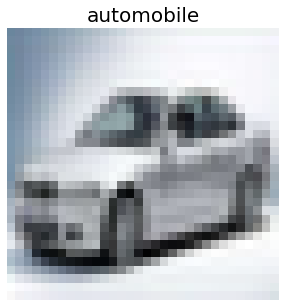

In [25]:
# 1. Randomly select one image from the test set
rand_id = np.random.choice(range(len(X_test)))
label = [labels_map[j] for j in y_test[rand_id]][-1]
image_data= X_test[rand_id]

fig = plt.figure(figsize=(5, 5))
imgplot = fig.add_subplot(1,1,1) 
imgplot.imshow(image_data)
imgplot.set_title(label, fontsize=20)
imgplot.axis('off')


In [26]:
#2. Predict the class for the image

image_data_s = np.expand_dims(image_data,0) #(32, 32, 3) -> (1, 32, 32, 3)
image_data_s = image_data_s.astype('float32')/255
pred_class = model.predict_classes(image_data_s)[0]
print("Predicted class is: ",labels_map[pred_class])

Predicted class is:  automobile


In [27]:
#3. Get the hidden feature vector for the image
image_hidden_feature = Get_Hidden_Layered_Output([image_data_s])[0]
print(image_hidden_feature.shape)

(1, 50)


In [28]:
#4. Calculate the euclidean distance between the hidden feature vector of the image and hidden feature vectors of all images in the training set
dists = np.linalg.norm(X_train_featureVector - image_hidden_feature, axis=1)  # Do search
dists.shape

(50000,)

In [29]:
#5. Select the top 10 images that have smallest Euclidean distance
top_ids = np.argsort(dists)[:10] # Top 10 results 
print(top_ids)

[46421 38278  7605 43646 49122 21014 30912 45406  6464 25063]


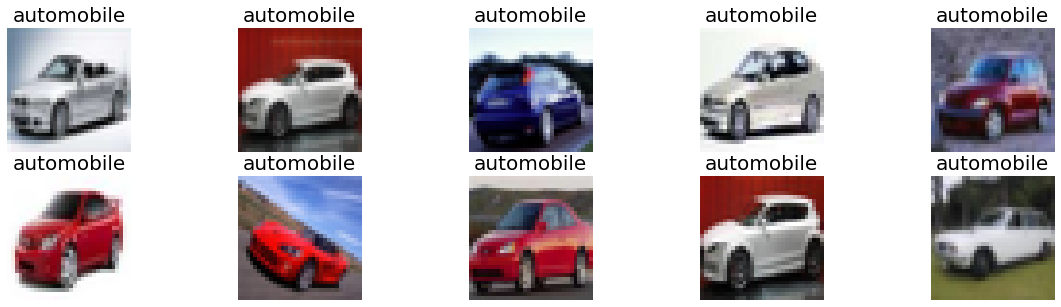

In [30]:
#6. Visualization of the searching results

fig = plt.figure(figsize=(20, 5))
for i in range(len(top_ids)):
  id = top_ids[i]
  label = [labels_map[j] for j in y_train[id]][-1]
  image_data= X_train[id]
  imgplot = fig.add_subplot(2,5,i+1) 
  imgplot.imshow(image_data)
  imgplot.set_title(label, fontsize=20)
  imgplot.axis('off')


**3. Objective 3. To start the clustering analysis on the test data** 

1). we can import kmeans from sklearn

2). Then create a kmeans model, **specifying the number of clusters **you want to find

3). Let’s specify 10 clusters since we have 10 different groups of digits.


In [31]:
from sklearn.cluster import KMeans
kmeans_model = KMeans(init='k-means++', n_clusters=10, n_init=5, n_jobs=8)


**3.1 Then we fit the model on the original scaled data (X_test_s)**

Since the image has three dimensions (32,32,3), we need flatten first for clustering

Note: 1~2 minutes to run on this data to get the mean of optimal clusters (centroid).


In [32]:
flattened_test_data = X_test_s.reshape(X_test_s.shape[0],32*32*3)

In [33]:
flattened_test_data.shape

(10000, 3072)

In [34]:
kmeans_model.fit(flattened_test_data)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=10, n_init=5, n_jobs=8, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

**3.2. After the clustering is done, we can predict the cluster labels.** 

This will returns a cluster label for each sample, indicating to which cluster a sample belongs.


**Your Task 8: get cluster labels using kmeans_model.predict()**




In [ ]:
## write your code here to predict the label for the clusters


In [35]:
test_cluster_labels  = kmeans_model.predict(flattened_test_data)

In [36]:
test_cluster_labels

array([1, 7, 0, ..., 2, 1, 9], dtype=int32)

**Your Task 9: Get the following contingency table based on the predicted cluster labels and true labels**




In [37]:
import pandas as pd
evaluation_df = pd.DataFrame({'cluster_labels':test_cluster_labels, 'true_labels': y_test.flatten()})
print(evaluation_df)

      cluster_labels  true_labels
0                  1            3
1                  7            8
2                  0            8
3                  7            0
4                  5            6
...              ...          ...
9995               4            8
9996               5            3
9997               2            5
9998               1            1
9999               9            7

[10000 rows x 2 columns]


In [ ]:
#### write codes to generate the contingency table


In [38]:
contingency_table = pd.crosstab(evaluation_df['cluster_labels'],evaluation_df['true_labels'])
contingency_table

true_labels,0,1,2,3,4,5,6,7,8,9
cluster_labels,,,,,,,,,,
0,98,179,49,68,59,43,33,166,241,326
1,84,159,63,114,48,194,88,79,122,67
2,32,112,120,128,138,93,221,63,35,21
3,208,46,85,61,21,38,41,26,41,41
4,232,34,105,59,54,99,12,49,156,33
5,30,52,65,145,164,155,68,140,38,32
6,103,88,53,81,38,71,85,117,26,125
7,115,96,33,19,20,21,9,45,278,166
8,56,95,243,152,236,167,211,186,39,66


**3.3. Let's visualize the images in each cluster** 

If the clustering is accurate, we expect to see same digit images are grouped into same cluster



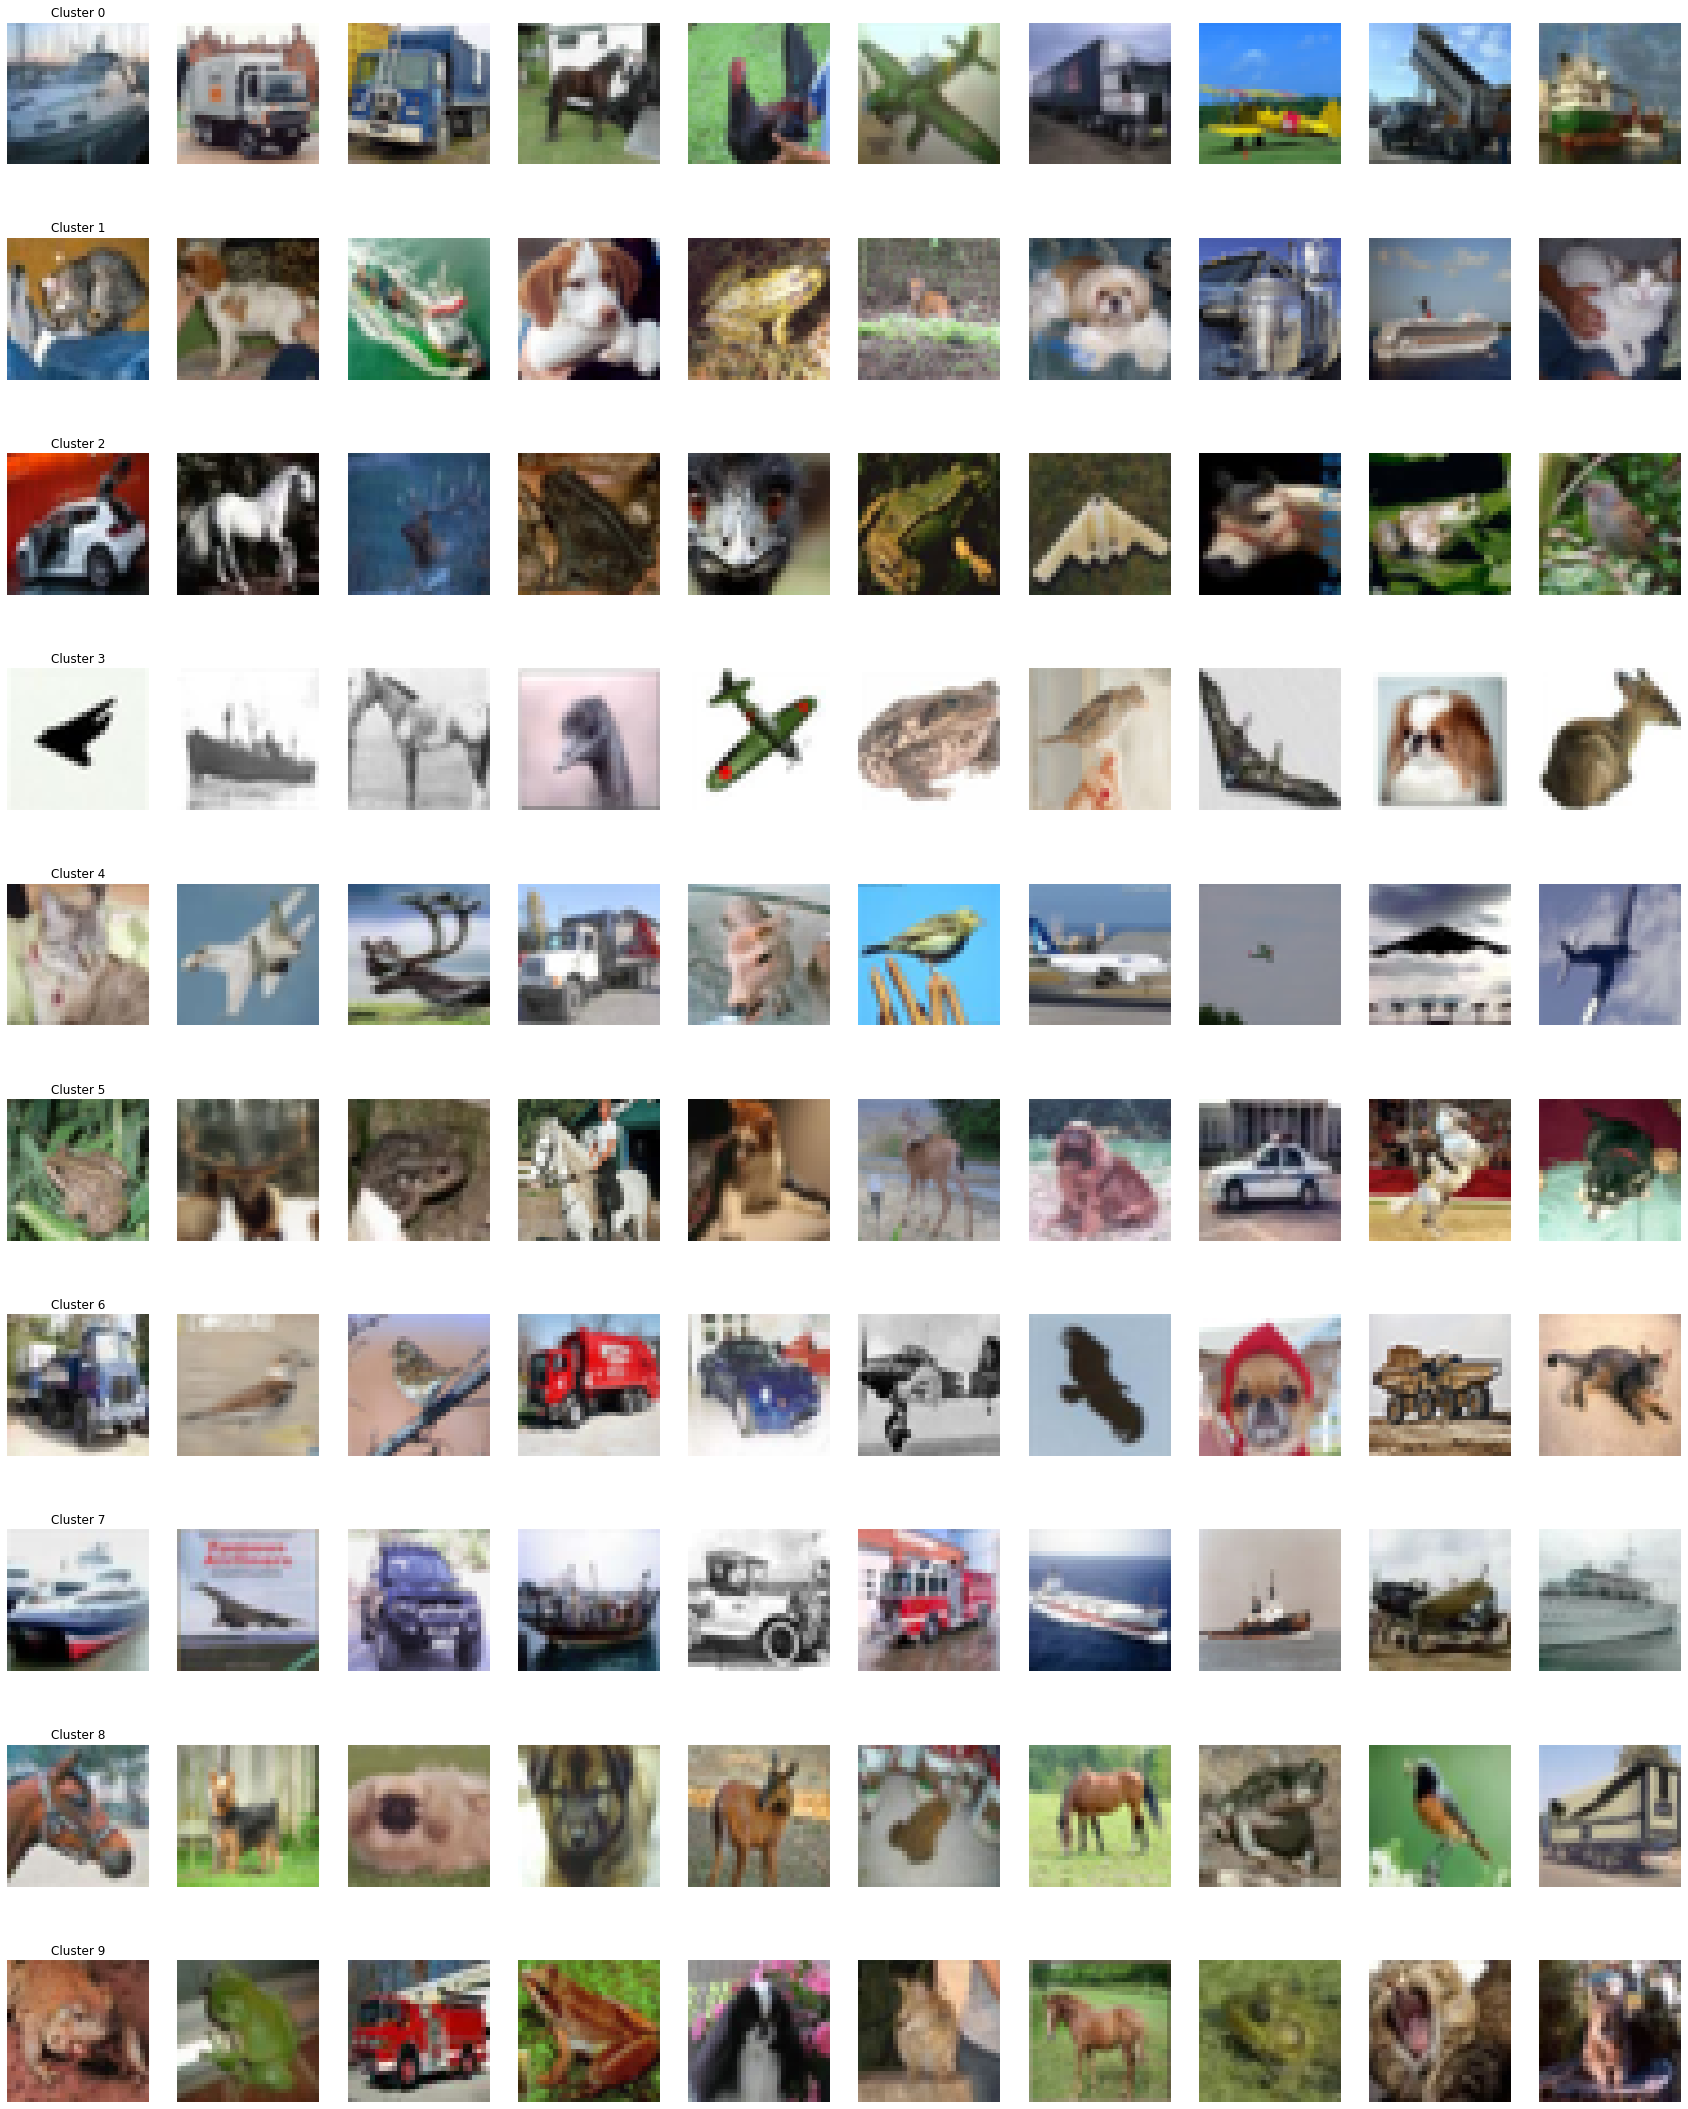

In [39]:
img_idx = 0
fig = plt.figure(figsize=(30,30))
plt.subplots_adjust(top = 0.99, bottom=0.01, hspace=0.2, wspace=0.2)
for  cluster_id in set(test_cluster_labels):
    cluster_images = flattened_test_data[test_cluster_labels==cluster_id]
    #select first 10 for visualization
    for i in range(10):
      plt.subplot(10,10,img_idx+1)
      plt.imshow(cluster_images[i].reshape(32,32,3), cmap='gray', interpolation='none')
      plt.axis('off')
      if i == 0: plt.title("Cluster {}".format(cluster_id))
      img_idx += 1


**3.4. Then we can visualize the clustering of the data using scatter plots.**

Here we can apply the **principal component analysis (PCA)** to reduce the dimension for visualization. 

We can try 2-dimension visualization and 3-dimension visualization


In [40]:
# For visualization, we need to apply PCA for dimension reduction 
# https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html
import numpy as np
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(flattened_test_data)
pca_data = pca.transform(flattened_test_data)

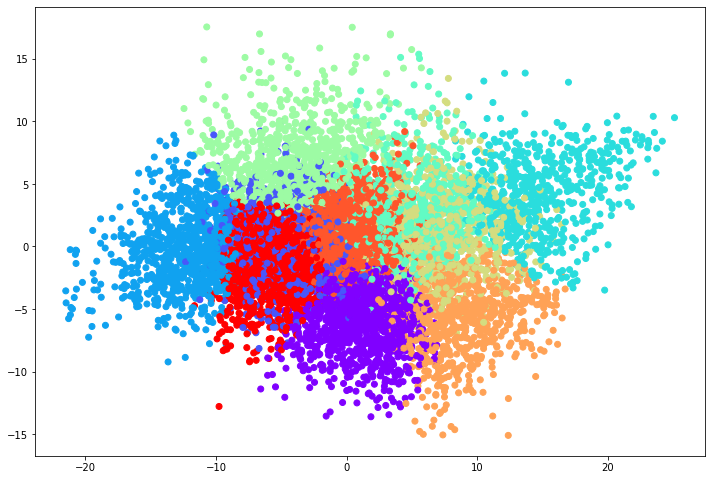

In [41]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,8))
plt.subplots_adjust(bottom = 0.1)
plt.scatter(pca_data[:, 0], pca_data[:, 1], c= test_cluster_labels, cmap='rainbow') 

plt.show()

**Your Task 10: Based on the visualization, describe your observations for the clustering performance using the original data**




In [ ]:
###### write your observation here
Based on the observation of clustering of the groups especially images of the animals are not getting clustered properly. From the scatterplot we can see that 
there too many images are clustered in the wrong groups. 




**3.5 Clustering using the extracted feature**: A better strategy is to use deep learning methods to extract hidden features from the image data, and then apply the clustering algorithm on those extract features. 


The general strategy is followed as:

1.  Pre-trained deep learning model(e.g., Neural network, CNN) for image feature extraction. The deep learning model can be derived from other image-based dataset. 
2.  Extracted features(neuron values for each image) from the last second layer which best desribe digit images.
3.  Clustered using KMeans algorithm from the extracted feature vector.

<img src="https://media.springernature.com/full/springer-static/image/art%3A10.1007%2Fs11042-018-6881-9/MediaObjects/11042_2018_6881_Fig3_HTML.png?as=webp" width="700" height="150">


Useful reference:
[Feature extraction using deep learning](https://medium.com/@franky07724_57962/using-keras-pre-trained-models-for-feature-extraction-in-image-clustering-a142c6cdf5b1)

https://keras.io/api/applications/

**3.5.1. Apply the clustering algorithm on the hidden features of the test images**


In [42]:
from sklearn.cluster import KMeans
kmeans_model = KMeans(init='k-means++', n_clusters=10, n_init=5, n_jobs=8)

kmeans_model.fit(X_test_featureVector)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=10, n_init=5, n_jobs=8, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

**3.5.2. Get clustering labels**

In [44]:
test_cluster_labels  = kmeans_model.predict(X_test_featureVector)

**3.5.3 Visualize the clusters using PCA**

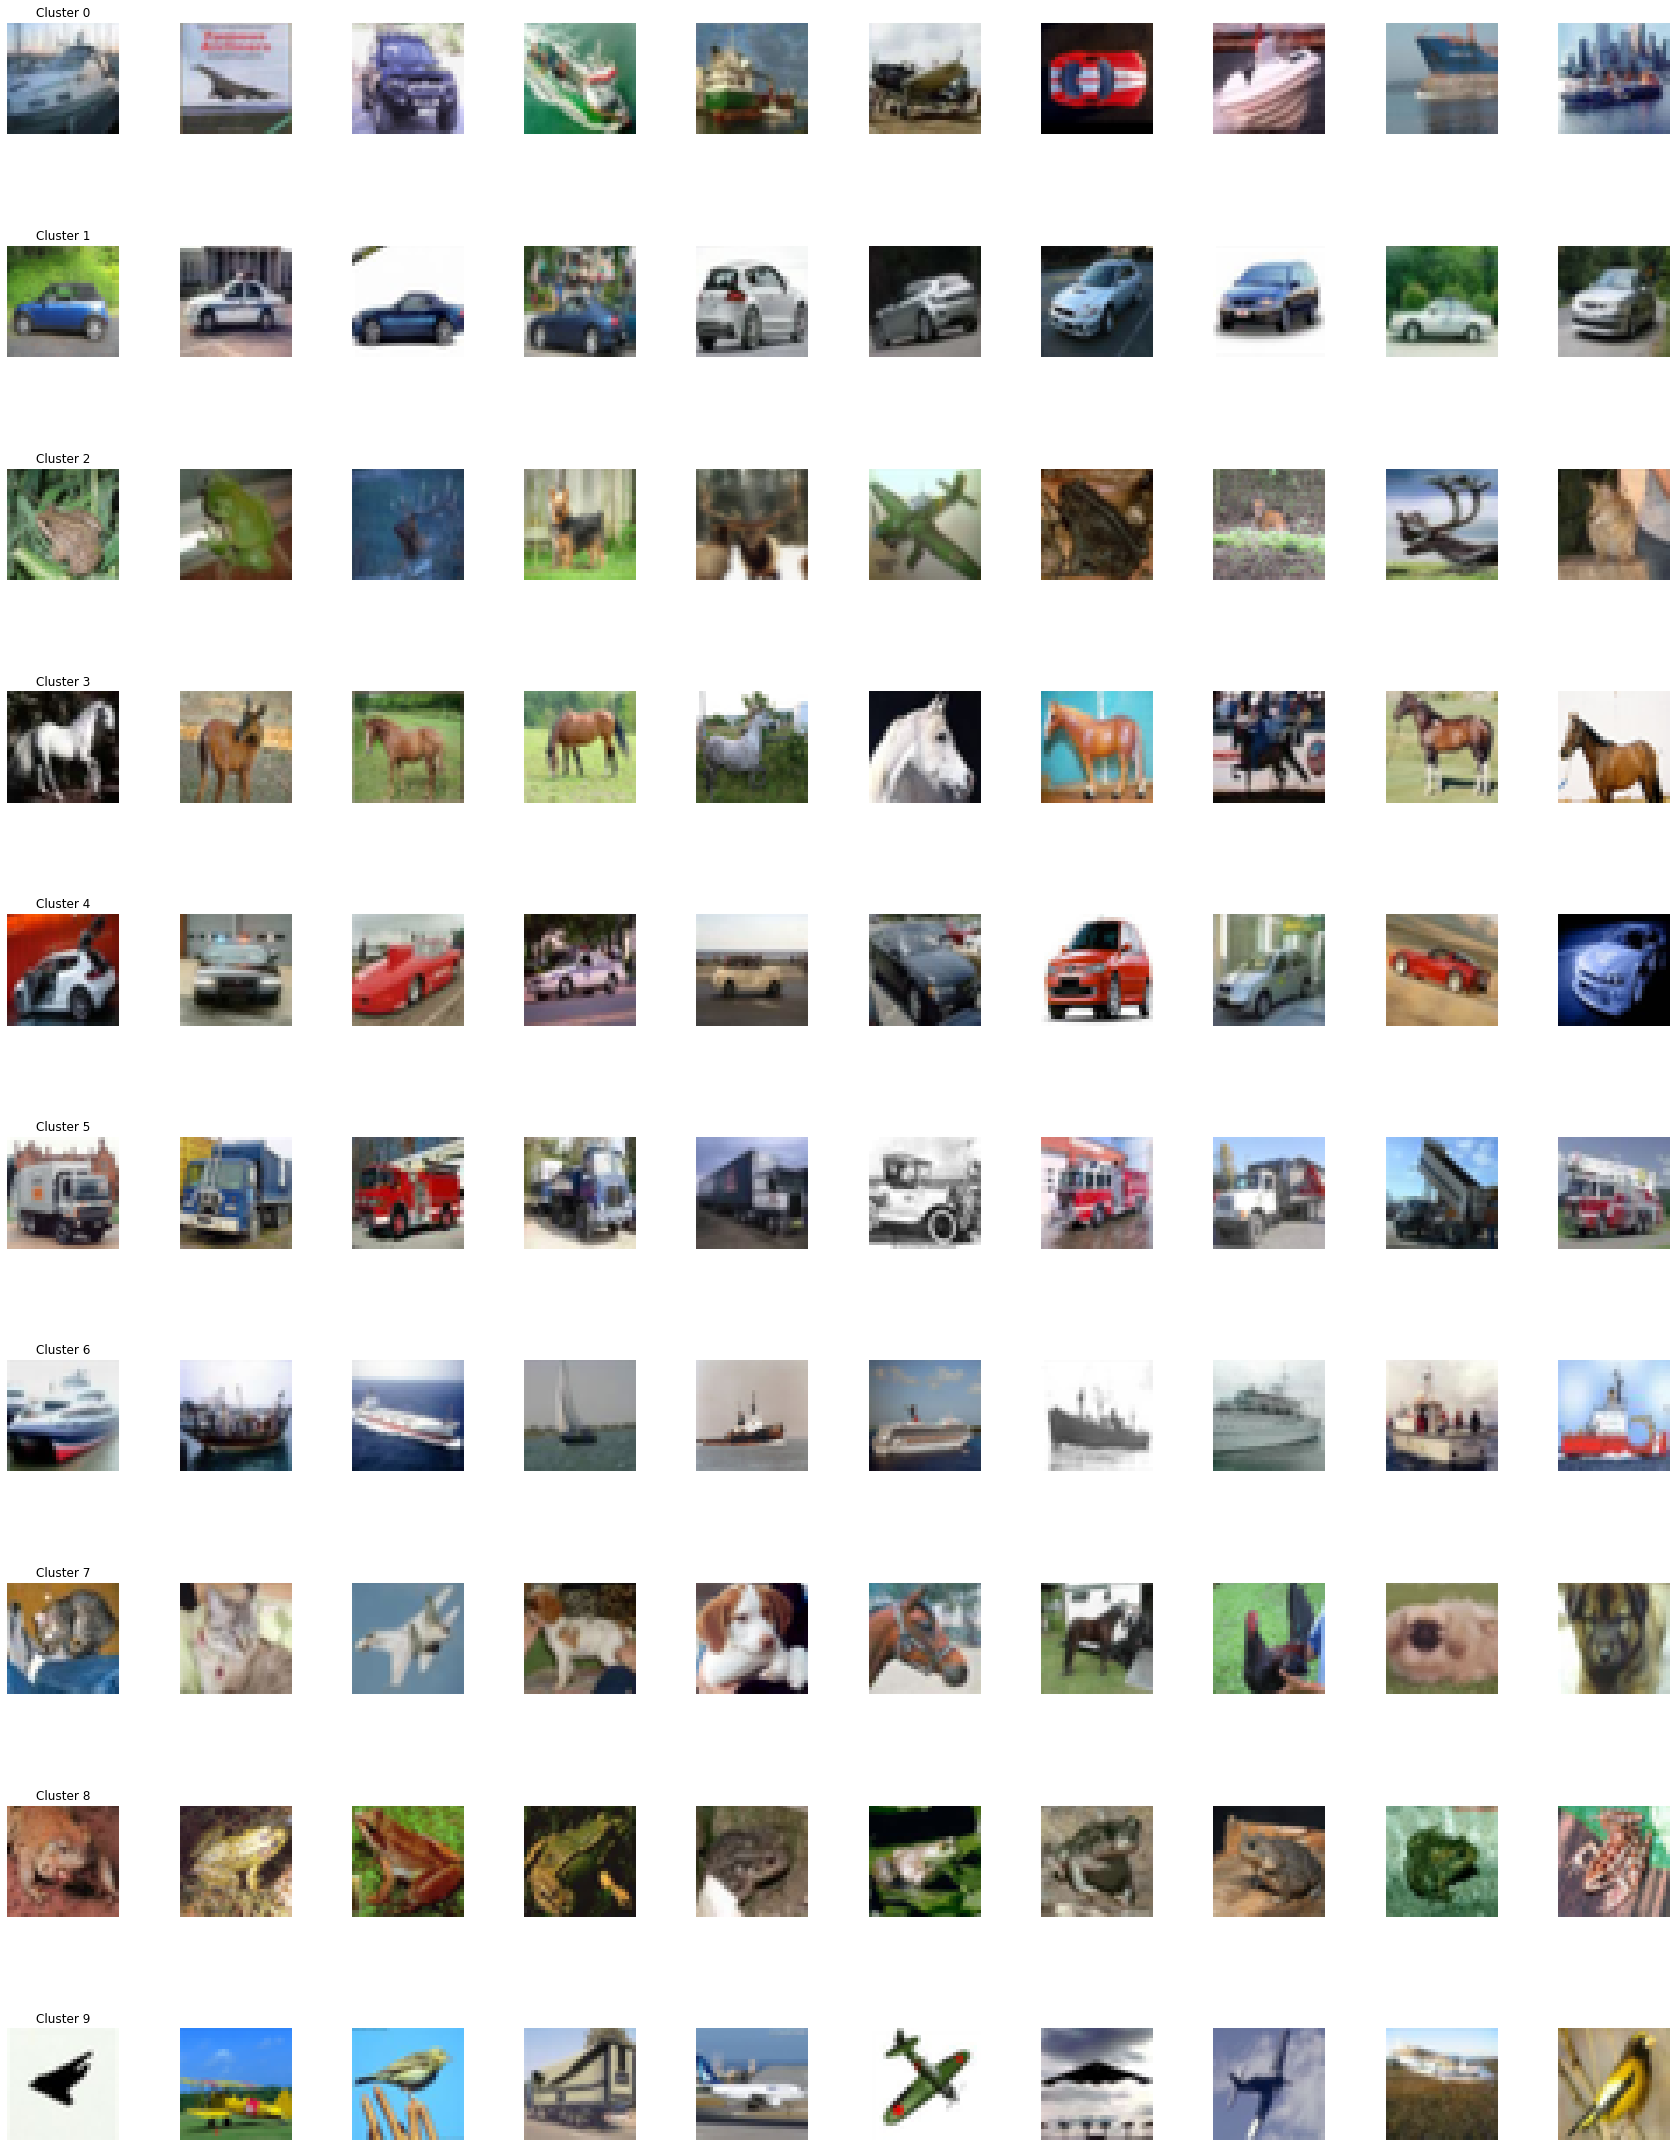

In [45]:
img_idx = 0
fig = plt.figure(figsize=(30,30))
plt.subplots_adjust(top = 0.99, bottom=0.01, hspace=1, wspace=0.4)
for  cluster_id in set(test_cluster_labels):
    cluster_images = X_test_s[test_cluster_labels==cluster_id]
    #select first 10 for visualization
    for i in range(10):
      plt.subplot(10,10,img_idx+1)
      plt.imshow(cluster_images[i].reshape(32,32,3), cmap='gray', interpolation='none')
      plt.axis('off')
      if i == 0: plt.title("Cluster {}".format(cluster_id))
      img_idx += 1

**Your Task 11: Let's visualize the points in 2D plot and 3D plot**

In [ ]:
#### write your codes in 2D plot

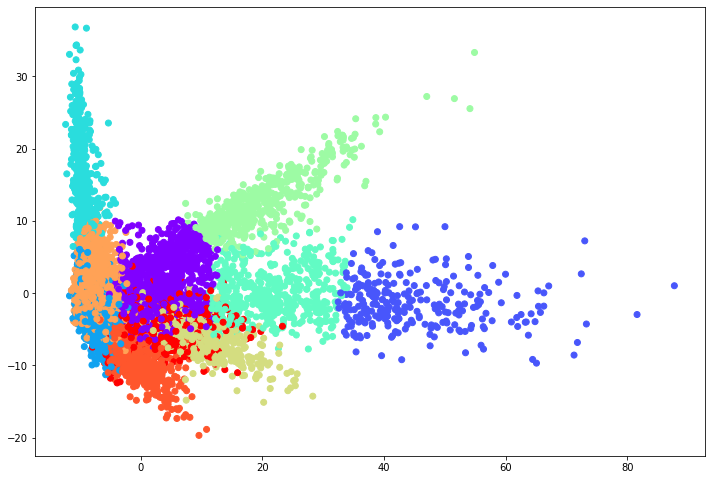

In [46]:
# For visualization, we need to apply PCA for dimension reduction 
# https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html
import numpy as np
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(X_test_featureVector)
pca_data = pca.transform(X_test_featureVector)

import matplotlib.pyplot as plt
plt.figure(figsize=(12,8))
plt.subplots_adjust(bottom = 0.1)
plt.scatter(pca_data[:, 0], pca_data[:, 1], c= test_cluster_labels, cmap='rainbow') 

plt.show()

In [ ]:
#### write your codes in 3D plot

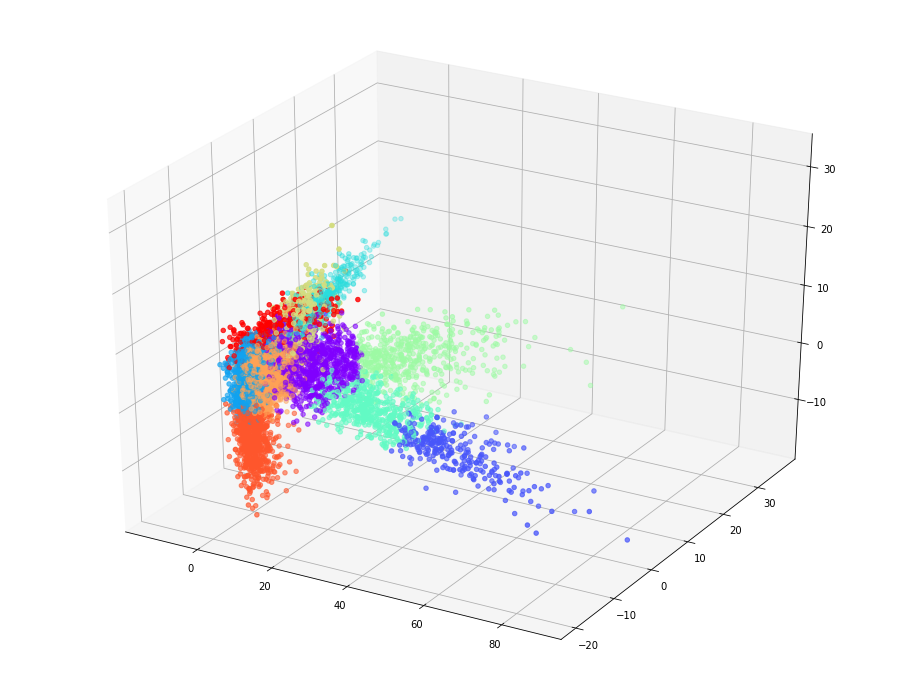

In [47]:
import matplotlib.pyplot as plt

import numpy as np
from sklearn.decomposition import PCA
pca = PCA(n_components=3)
pca.fit(X_test_featureVector)
pca_data = pca.transform(X_test_featureVector)

plt.figure(figsize=(16,12))
plt.subplots_adjust(bottom = 0.1)
ax = plt.axes(projection ="3d")
ax.scatter3D(pca_data[:, 0], pca_data[:, 1], pca_data[:, 2], c=test_cluster_labels, cmap='rainbow') 

plt.show()

**3.5.4 Visualize the clusters using TSNE**

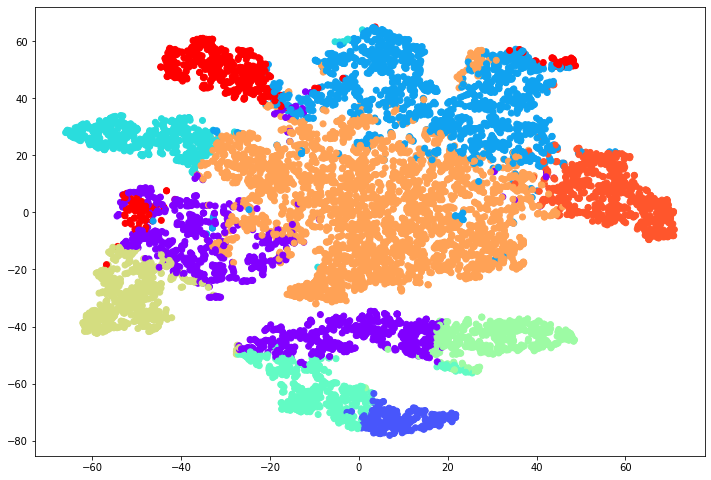

In [48]:
from sklearn.manifold import TSNE
TSNE_model = TSNE(learning_rate=100)
transformed = TSNE_model.fit_transform(X_test_featureVector)

# For visualization, we need to apply TSNE for feature selection
# https://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.html

import matplotlib.pyplot as plt
plt.figure(figsize=(12,8))
plt.subplots_adjust(bottom = 0.1)
plt.scatter(transformed[:, 0], transformed[:, 1], c= test_cluster_labels, cmap='rainbow') 

plt.show()

**3.5.5. Get the contingency table**

In [49]:

import pandas as pd
evaluation_df = pd.DataFrame({'cluster_labels':test_cluster_labels, 'true_labels': y_test.flatten() })
print(evaluation_df)
contingency_table = pd.crosstab(evaluation_df['cluster_labels'],evaluation_df['true_labels'])
contingency_table


      cluster_labels  true_labels
0                  7            3
1                  6            8
2                  0            8
3                  0            0
4                  2            6
...              ...          ...
9995               7            8
9996               7            3
9997               7            5
9998               0            1
9999               3            7

[10000 rows x 2 columns]


true_labels,0,1,2,3,4,5,6,7,8,9
cluster_labels,,,,,,,,,,
0,224,208,18,15,9,3,9,14,330,413
1,0,274,0,0,0,0,0,0,0,0
2,85,2,520,69,755,28,124,47,7,4
3,0,0,0,0,28,7,0,512,0,0
4,3,472,0,0,0,0,0,0,5,40
5,0,13,0,0,0,0,0,0,0,481
6,11,4,0,1,0,0,0,0,586,1
7,146,23,349,901,194,961,188,425,56,59
8,0,4,29,13,11,1,679,1,0,1


**Your Task 12: Try different number of clusters and Find the optimal clusters based on Inertia**

In [ ]:
##### Write codes to plot Inertia figure (X-axis: number of different clusters. Y-axis: Inertia)

In [50]:
from sklearn.cluster import KMeans 
elbow={"inertia":[],"clusters":[]}

for i in range(2,15): 
    print("Clustering data into ", i, ' groups')
    model=KMeans(i, n_init=5, n_jobs=8) 
    elbow["clusters"].append(i) 
    model.fit(X_test_featureVector) 
    elbow["inertia"].append(model.inertia_)

Clustering data into  2  groups
Clustering data into  3  groups
Clustering data into  4  groups
Clustering data into  5  groups
Clustering data into  6  groups
Clustering data into  7  groups
Clustering data into  8  groups
Clustering data into  9  groups
Clustering data into  10  groups
Clustering data into  11  groups
Clustering data into  12  groups
Clustering data into  13  groups
Clustering data into  14  groups


Text(0.5, 1.0, 'Elbow Graph')

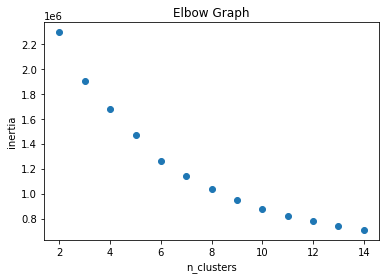

In [51]:
plt.scatter(x=elbow["clusters"],y=elbow["inertia"]) 
plt.xlabel("n_clusters") 
plt.ylabel("inertia") 
plt.title("Elbow Graph")

In [ ]:
##### Describe what's your observations after clustering using hidden feature vectors of images.

After using the hidden features the clustering is much more accurate. As we have extracted features from the second last hidden layer which contains very important information we have for inputs. Basically the hidden features are converted low dimensional features from the original data which is giving us a far better clustering performance than we got before.

#  **4. Hierarchical Clustering**


Here let's randomly select 5 images from each group to form a small dataset. 
Then we can apply hierarchical clustering on this small dataset to examine if any hierarchical patterns exist among these objects.

**4.1 Generate small dataset**

In [52]:
small_set_images = []
small_set_labels = []

X_train
for label in range(0,10):
  X_sub = X_train[y_train.flatten()==label]
  y_sub = y_train[y_train.flatten()==label]
  rand_id = np.random.choice(range(len(X_sub)),size=5)
  images = X_sub[rand_id]
  labels = y_sub[rand_id]
  small_set_images.append(images)
  small_set_labels.append(labels)

small_set_images = np.concatenate(small_set_images,axis=0)
small_set_labels = np.concatenate(small_set_labels,axis=0).flatten()
small_set_labels_name = [labels_map[j] for j in small_set_labels]

print(small_set_images.shape)
print(small_set_labels.shape)
print(len(small_set_labels_name))

(50, 32, 32, 3)
(50,)
50


In [53]:
small_set_labels

array([0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 4, 4,
       4, 4, 4, 5, 5, 5, 5, 5, 6, 6, 6, 6, 6, 7, 7, 7, 7, 7, 8, 8, 8, 8,
       8, 9, 9, 9, 9, 9], dtype=uint8)

In [54]:
labels_map

['airplane',
 'automobile',
 'bird',
 'cat',
 'deer',
 'dog',
 'frog',
 'horse',
 'ship',
 'truck']

**4.2 Visualize the dataset**

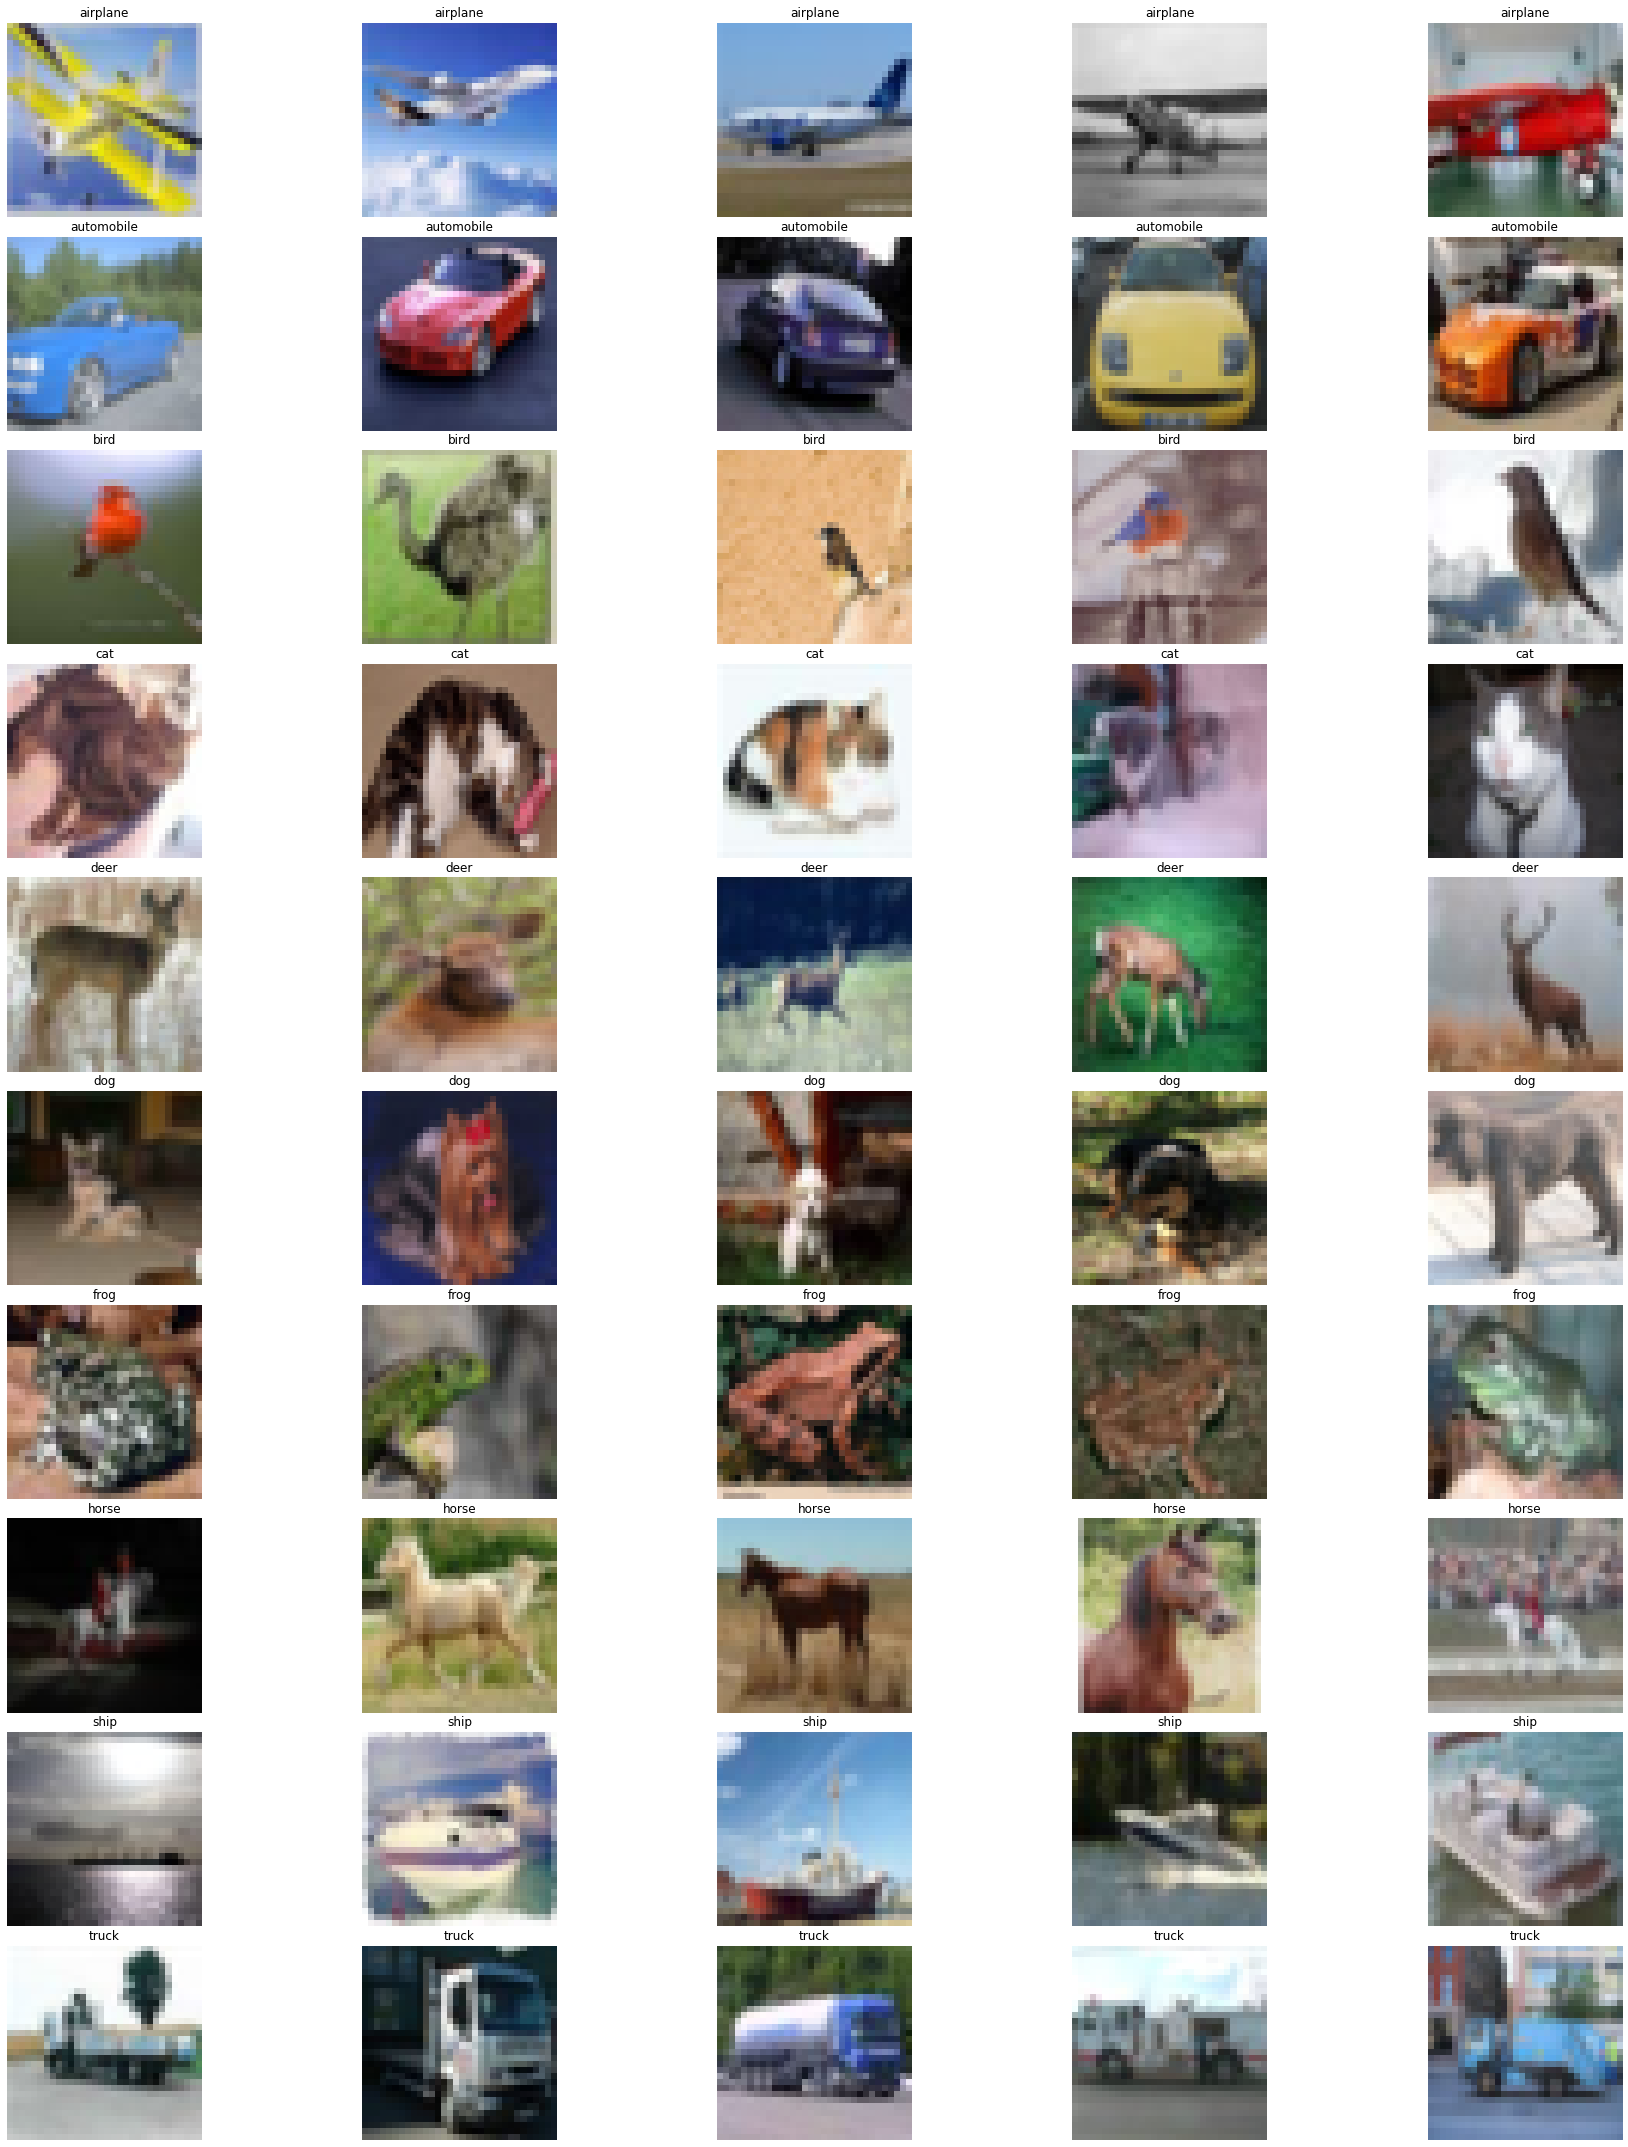

In [55]:
img_idx = 0
fig = plt.figure(figsize=(30,30))
plt.subplots_adjust(top = 0.99, bottom=0.01, hspace=0.1, wspace=0.4)
for  label_id in set(small_set_labels):
    subset_images = small_set_images[small_set_labels==label_id]
    subset_images_name = labels_map[label_id]
    #select first 10 for visualization
    for i in range(5):
      plt.subplot(10,5,img_idx+1)
      plt.imshow(subset_images[i].reshape(32,32,3), cmap='gray', interpolation='none')
      plt.axis('off')
      plt.title(subset_images_name)
      img_idx += 1

**4.3 Get the hidden features for all images in sample dataset**

In [56]:
data_featureVector = Get_Hidden_Layered_Output(small_set_images.astype('float32')/255)[0]

In [57]:
data_featureVector.shape

(50, 50)

In [58]:
data_featureVector[1]

array([ 0.        ,  0.        ,  0.        ,  0.        , 13.639856  ,
        6.0747623 ,  0.        ,  0.        ,  0.        , 11.151402  ,
        0.        ,  0.        ,  3.937304  ,  0.        ,  6.979651  ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.26830047,  4.5242577 ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
       10.512452  ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  1.0045639 ,
       18.720652  ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  3.0551171 ,  0.        ,  0.        ],
      dtype=float32)

**4.4 Generate dendrogram using hierarchical clustering**

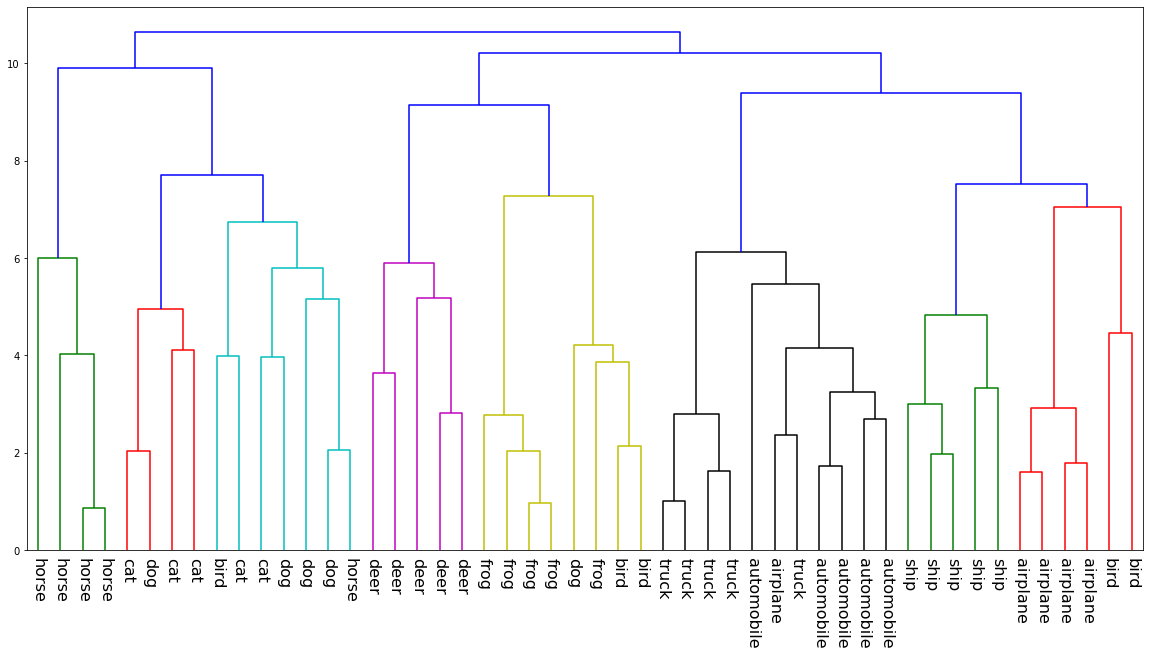

In [59]:
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import linkage, dendrogram



fig = plt.figure(figsize=(20,10))

from scipy import stats

# normalize by each sample before applying hierarchical clustering (we used relu in feature generation, so the feature magnitude is different)
data_featureVector_s = stats.zscore(data_featureVector, axis=1, ddof=1)

mergings = linkage(data_featureVector_s, method = 'complete')
dendrogram(mergings, labels = small_set_labels_name, leaf_rotation=-90, leaf_font_size=16)
plt.show()



**4.5 Generate clusters from the dendrogram**

Based on visual inspection, I set the height cutoff to 8

In [60]:
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import fcluster
labels = fcluster(mergings, 8, criterion = 'distance')
print(labels)



[6 6 6 6 5 5 5 5 5 5 6 4 4 2 6 2 2 2 2 2 3 3 3 3 3 2 2 2 4 2 4 4 4 4 4 1 1
 1 2 1 6 6 6 6 6 5 5 5 5 5]


**4.6 Visualize the contingency table**

In [61]:
import pandas as pd
evaluation_df = pd.DataFrame({'cluster_labels': labels, 'true_labels': small_set_labels_name})
print(evaluation_df.sort_values('cluster_labels'))


    cluster_labels true_labels
39               1       horse
37               1       horse
36               1       horse
35               1       horse
15               2         cat
16               2         cat
29               2         dog
19               2         cat
13               2        bird
18               2         cat
38               2       horse
25               2         dog
26               2         dog
27               2         dog
17               2         cat
22               3        deer
21               3        deer
20               3        deer
23               3        deer
24               3        deer
12               4        bird
11               4        bird
33               4        frog
34               4        frog
31               4        frog
28               4         dog
32               4        frog
30               4        frog
45               5       truck
46               5       truck
47               5       truck
49      

In [62]:

import pandas as pd
contingency_table = pd.crosstab(evaluation_df['cluster_labels'],evaluation_df['true_labels'])
contingency_table


true_labels,airplane,automobile,bird,cat,deer,dog,frog,horse,ship,truck
cluster_labels,,,,,,,,,,
1,0,0,0,0,0,0,0,4,0,0
2,0,0,1,5,0,4,0,1,0,0
3,0,0,0,0,5,0,0,0,0,0
4,0,0,2,0,0,1,5,0,0,0
5,1,5,0,0,0,0,0,0,0,5
6,4,0,2,0,0,0,0,0,5,0


**4.7 Draw heatmap with clustering**

In [63]:
data_featureVector.shape

(50, 50)

<Figure size 1440x720 with 0 Axes>

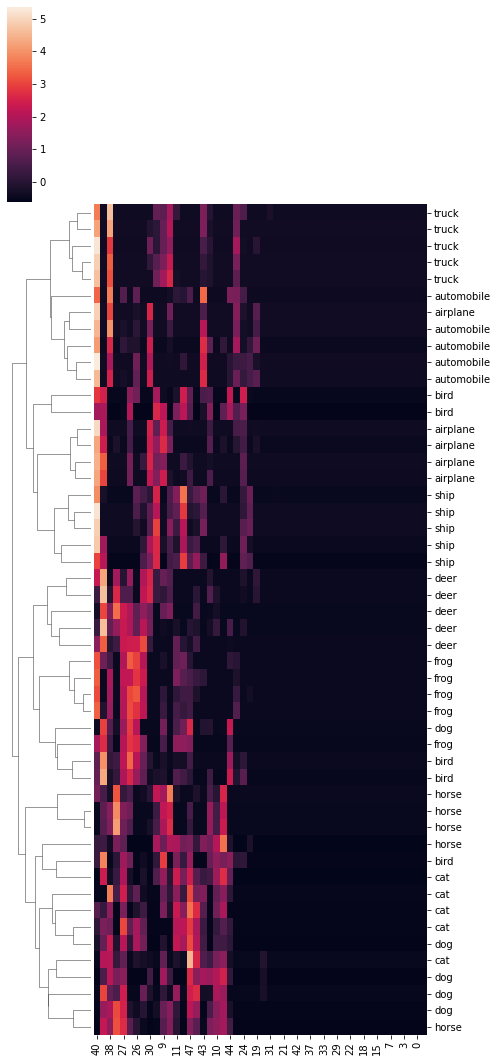

In [64]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(20,10))
data = pd.DataFrame(data_featureVector,index=small_set_labels_name)
cg=sns.clustermap(data, figsize=(7, 15), z_score=0)
cg.ax_col_dendrogram.set_visible(False)
plt.show()


# **5. Practice: Develop an image search engine using web development**

**5.1 Prepare the training dataset**

In [65]:


from keras.datasets import cifar10
import matplotlib.pyplot as plt
import numpy as np
import base64

(X_train, y_train), (X_test, y_test) = cifar10.load_data()

#### To communiate images between web and google drive, I convert images to bytes and send to web for visualization (this is easier) instead of letting web to read files from google drive directory (this is complex).

# Loading image features and encoded ASCII of image
# We use base64 module for encoding binary image data to printable ASCII characters for web application.


img_features = []
img_ASCIIs = []
for i in range(X_train.shape[0]):
  from PIL import Image
  img = Image.fromarray(X_train[i])
  ### add image feature
  img_features.append(img)

  ### add image ASCII
  from io import BytesIO as _BytesIO
  buff = _BytesIO()
  img.save(buff, format='png')
  img_byte = base64.b64encode(buff.getvalue()).decode("utf-8")
  img_ASCIIs.append(img_byte)


## Feature Min-Max normalization
X_train_s = X_train.astype('float32')/255

X_train_featureVector = []
batch_size = 500
for i in range(int(X_train_s.shape[0]/batch_size)):
  X_train_featureVector.append(Get_Hidden_Layered_Output([X_train_s[i*batch_size:(i+1)*batch_size,:,:,:]])[0])

X_train_featureVector = np.concatenate(X_train_featureVector,axis=0)




**5.2 Generate several testing images**

In [66]:

## generate random test images, you can download the images to local for testing

idx = 0
for label in range(0,10):
  X_sub = X_train[y_train.flatten()==label]
  y_sub = y_train[y_train.flatten()==label]
  rand_id = np.random.choice(range(len(X_sub)),size=2)
  for id in rand_id:
      image = X_sub[id]
      from PIL import Image
      im = Image.fromarray(image)
      im.save('image'+str(idx)+'.jpg')
      idx += 1


**5.3 Set up environment for the web development**

More details for the web development using Flask can be found at https://flask.palletsprojects.com/en/1.1.x/

In [67]:
## web application packages
!pip install flask-ngrok
from flask_ngrok import run_with_ngrok
from flask import Flask, request, render_template
from PIL import Image
from datetime import datetime
import os

if not os.path.exists("./uploaded/"):
    os.makedirs("./uploaded/")
if not os.path.exists("./templates/"):
    os.makedirs("./templates/")

**5.4 Write webpage for front-end visualization**

In [68]:
###### (2) Write webpage for front-end visualization
%%writefile templates/index.html
<!doctype html>
<html>
    <head><link rel="stylesheet" href="https://maxcdn.bootstrapcdn.com/bootstrap/3.3.7/css/bootstrap.min.css"></head>
    <body>
        <div class="container">
            <h1>CSCI4750/5750: Simple image search algorithm</h1>
            <h2>Upload your image to search:</h2>
            <form method="POST" enctype="multipart/form-data">
                <input type="file" name="query_img"><br>
                <input type="submit">
            </form>
            <hr>
            <h2>Query image:</h2>
            {% if query_img_bytes %} <!--Send images as Base64String-->
            <img src="data:image/png;base64,{{ query_img_bytes }}" alt="Query Image"  width="300px">
            {% endif %}
            <h2>Algorithm Results:</h2>
            {% for score in scores %}
            <figure style="float: left; margin-right: 20px; margin-bottom: 20px;">
                <!--Send images as Base64String-->
                <img src="data:image/png;base64,{{ score[1] }}" alt="Results Image"  width="300px" height="150px">
                <figcaption>L2-norm score: {{ score[0] }}</figcaption>
            </figure>
            {% endfor %}
        </div>
    </body>
</html>




Writing templates/index.html


**5.5  Implement back-end and front-end application**

In [ ]:
##### (3) Implement back-end and front-end application


from keras.backend import clear_session
clear_session()

app = Flask(__name__)
run_with_ngrok(app)   #starts ngrok when the app is run


def calculate_similarity_L2norm(image_sets, query_image):
  ##### Write your python codes below to get similarity scores between query image and database images, 
  ##### And return the top 5 images that have highest similarities.
  ##### The return value should be a list of tuples, each containing three information (L2-norm, ASCII of image)
  ##### Such as [(0.053, 'iVBORw0KGgoAAAANSUhEUgAAAjwAAADXC', 'images/texts/ROI_10_resized.png'),(0.061, 'lAAAgAElEQVR4AYzBAWIkWZYcRvMX', 'images/texts/ROI_2_resized.png')]
  dists = np.linalg.norm(image_sets - query_image, axis=1)  # Do search
  ids = np.argsort(dists)[:5] # Top 5 results
  scores = [(dists[id], img_ASCIIs[id]) for id in ids]
  return scores

def home():
    return render_template('index.html')

@app.route('/', methods=['GET', 'POST'])
def index():
    if request.method == 'POST':
        file = request.files['query_img']
        img = Image.open(file.stream)  # PIL image
        uploaded_img_path = "./uploaded/" + datetime.now().isoformat() + "_" + file.filename
        img.save(uploaded_img_path)
        with open(uploaded_img_path, "rb") as img_file:
          uploaded_img_byte = base64.b64encode(img_file.read()).decode('utf-8')
        
        #### Extract features
        img = img.resize((32, 32))
        img = img.convert('RGB')
        from keras.preprocessing import image
        x = image.img_to_array(img)  # To np.array. Height x Width x Channel. dtype=float32
        x = np.expand_dims(x, axis=0)  # (H, W, C)->(1, H, W, C), where the first elem is the number of img
        
        x = x.astype('float32')/255
        pred_class = model.predict_classes(x)[0]

        query_feature =  Get_Hidden_Layered_Output(x)[0] 
        

        ''' 
        calculate the distance between query and image sets
        '''
        scores = calculate_similarity_L2norm(X_train_featureVector,query_feature)
        #############

        return render_template('index.html',
                               query_img_bytes=uploaded_img_byte,
                               scores=scores)
    else:
        
        return render_template('index.html')


app.run() 

 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


 * Running on http://127.0.0.1:5000/ (Press CTRL+C to quit)


 * Running on http://516ba173dc00.ngrok.io
 * Traffic stats available on http://127.0.0.1:4040
